<a href="https://colab.research.google.com/github/okana2ki/hotel-analysis/blob/main/search_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First, let's read the contents of the uploaded file to understand its structure and data.
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/Colab_files/sekitotaka2.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe to understand its structure
data.head()


,nen,tuki,sekino,takatihob,kion
0,2014,4,12,40,15.1
1,2014,5,17,79,19.4
2,2014,6,8,27,21.7
3,2014,7,16,33,26.6
4,2014,8,17,50,26.6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting the relevant columns
X = data[['tuki', 'takatihob', 'kion']]  # Features: month, takatihob, temperature
y = data['sekino']  # Target: sekino

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Displaying the model's Mean Squared Error
mse

48.054369847831715

In [ ]:
import numpy as np

# Function to convert months to cyclic coordinates
def encode_cyclic_feature(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

# Applying the function to the 'tuki' column
data = encode_cyclic_feature(data, 'tuki', 12)

# New features based on the 'tuki' column
data[['tuki', 'tuki_sin', 'tuki_cos']].head()

,tuki,tuki_sin,tuki_cos
0,4,8.660254e-01,-0.500000
1,5,5.000000e-01,-0.866025
2,6,1.224647e-16,-1.000000
3,7,-5.000000e-01,-0.866025
4,8,-8.660254e-01,-0.500000


In [ ]:
# Updating the feature set to include the cyclically encoded month features
X = data[['tuki_sin', 'tuki_cos', 'takatihob', 'kion']]  # Updated features

# Splitting the data into training and testing sets with the new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model with the new features
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model with the new features
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Displaying the updated model's Mean Squared Error
mse

41.04091674343682

In [ ]:
from sklearn.model_selection import cross_val_score

# Creating a new Linear Regression model for cross-validation
model_cv = LinearRegression()

# Performing 10-fold cross-validation
# 'neg_mean_squared_error' is used to calculate MSE for each fold
scores = cross_val_score(model_cv, X, y, cv=10, scoring='neg_mean_squared_error')

# Converting scores to positive values (as they are negated by default)
mse_scores = -scores

# Calculating average MSE across all folds
average_mse = np.mean(mse_scores)

# Displaying the MSE for each fold and the average MSE
mse_scores, average_mse

(array([ 45.92152457,  36.29607852,  25.58273413,  44.53977634,
         82.06858731, 221.35955184,  86.8606113 ,  14.21324315,
         35.78143054,  20.9454097 ]),
 61.35689474032898)

In [ ]:
# First, we will perform cross-validation on the original dataset (without cyclic encoding of the month)
# Selecting the original feature set (without cyclically encoded month features)
X_original = data[['tuki', 'takatihob', 'kion']]

# Performing 10-fold cross-validation on the original dataset
scores_original = cross_val_score(model_cv, X_original, y, cv=10, scoring='neg_mean_squared_error')

# Converting scores to positive values and calculating average MSE
mse_scores_original = -scores_original
average_mse_original = np.mean(mse_scores_original)

# Comparing the average MSE before and after feature engineering
average_mse_original, average_mse  # Original MSE, MSE after feature engineering


(59.1871231656652, 61.35689474032898)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Creating RandomForest and GradientBoosting models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Performing 10-fold cross-validation on the original dataset with RandomForest
rf_scores_original = cross_val_score(rf_model, X_original, y, cv=10, scoring='neg_mean_squared_error')
rf_mse_scores_original = -rf_scores_original
rf_average_mse_original = np.mean(rf_mse_scores_original)

# Performing 10-fold cross-validation on the original dataset with GradientBoosting
gb_scores_original = cross_val_score(gb_model, X_original, y, cv=10, scoring='neg_mean_squared_error')
gb_mse_scores_original = -gb_scores_original
gb_average_mse_original = np.mean(gb_mse_scores_original)

rf_average_mse_original, gb_average_mse_original  # RandomForest MSE, GradientBoosting MSE

(58.37517833333334, 70.06602371519685)

In [ ]:
# Performing 10-fold cross-validation on the dataset with cyclically encoded month features using RandomForest
rf_scores = cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_squared_error')
rf_mse_scores = -rf_scores
rf_average_mse = np.mean(rf_mse_scores)

# Performing 10-fold cross-validation on the dataset with cyclically encoded month features using GradientBoosting
gb_scores = cross_val_score(gb_model, X, y, cv=10, scoring='neg_mean_squared_error')
gb_mse_scores = -gb_scores
gb_average_mse = np.mean(gb_mse_scores)

rf_average_mse, gb_average_mse  # RandomForest MSE, GradientBoosting MSE after feature engineering

(57.288358333333335, 64.81183640170926)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Creating a KNeighborsRegressor model
knn_model = KNeighborsRegressor()

# Performing 10-fold cross-validation on the original dataset with KNeighborsRegressor
knn_scores_original = cross_val_score(knn_model, X_original, y, cv=10, scoring='neg_mean_squared_error')
knn_mse_scores_original = -knn_scores_original
knn_average_mse_original = np.mean(knn_mse_scores_original)

# Performing 10-fold cross-validation on the dataset with cyclically encoded month features using KNeighborsRegressor
knn_scores = cross_val_score(knn_model, X, y, cv=10, scoring='neg_mean_squared_error')
knn_mse_scores = -knn_scores
knn_average_mse = np.mean(knn_mse_scores)

knn_average_mse_original, knn_average_mse  # KNeighborsRegressor MSE before and after feature engineering

(60.697333333333326, 70.65066666666667)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creating a Feedforward Neural Network model
# Using a pipeline to standardize features before feeding them to the neural network
nn_model = make_pipeline(StandardScaler(), MLPRegressor(random_state=42, max_iter=2500, hidden_layer_sizes=50))

# Performing 10-fold cross-validation on the original dataset with Neural Network
nn_scores_original = cross_val_score(nn_model, X_original, y, cv=10, scoring='neg_mean_squared_error')
nn_mse_scores_original = -nn_scores_original
nn_average_mse_original = np.mean(nn_mse_scores_original)

# Performing 10-fold cross-validation on the dataset with cyclically encoded month features using Neural Network
nn_scores = cross_val_score(nn_model, X, y, cv=10, scoring='neg_mean_squared_error')
nn_mse_scores = -nn_scores
nn_average_mse = np.mean(nn_mse_scores)

nn_average_mse_original, nn_average_mse  # Neural Network MSE before and after feature engineering

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

(55.172993855196104, 54.33445564224428)

In [1]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/Colab_files/sekitotaka2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,nen,tuki,sekino,takatihob,kion
0,2014,4,12,40,15.1
1,2014,5,17,79,19.4
2,2014,6,8,27,21.7
3,2014,7,16,33,26.6
4,2014,8,17,50,26.6


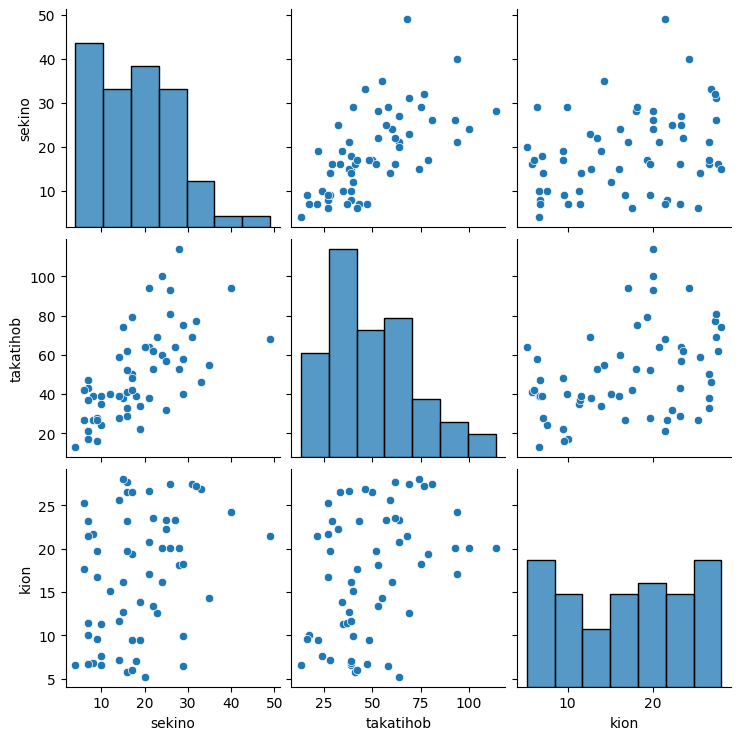

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns for the scatter plot matrix
columns_to_plot = data[['sekino', 'takatihob', 'kion']]

# Create a pairplot (scatter plot matrix) for the selected columns
sns.pairplot(columns_to_plot)

# Show the plot
plt.show()

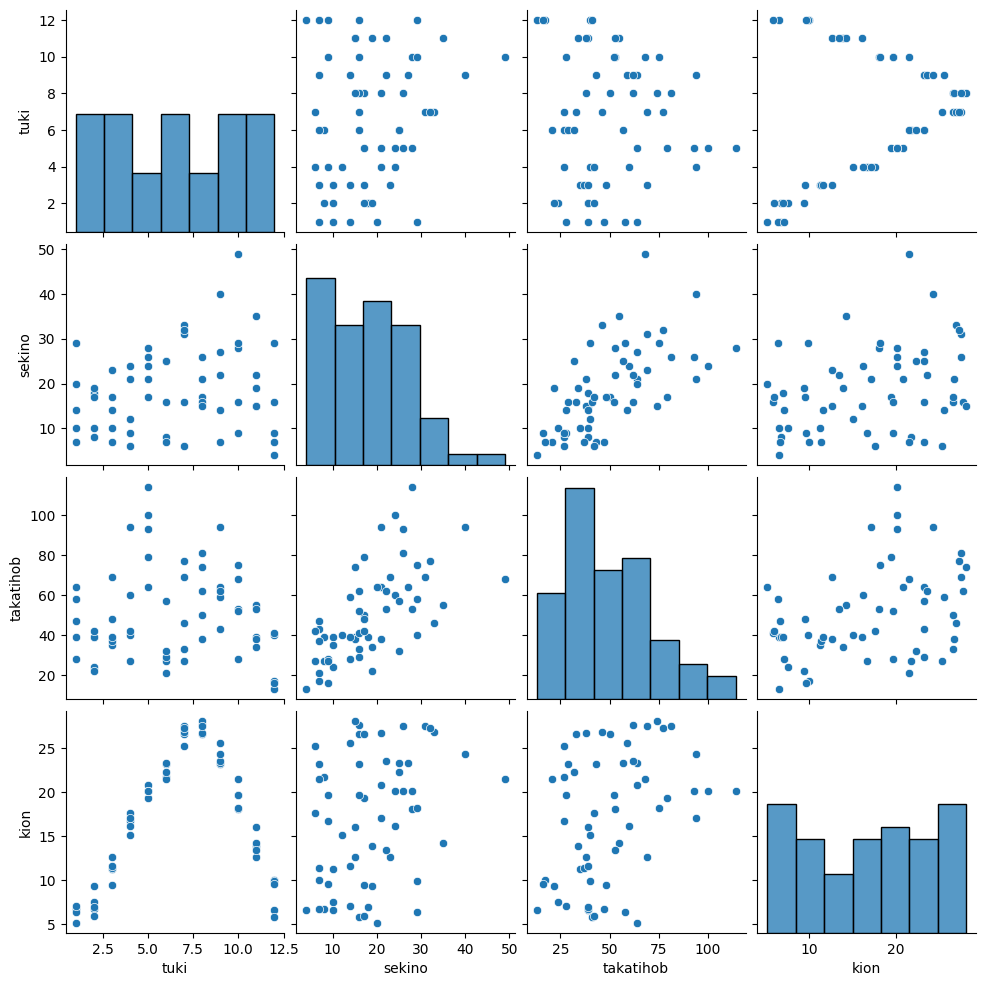

In [3]:
# Including the 2nd column ('tuki') in the scatter plot matrix
columns_to_plot_with_tuki = data[['tuki', 'sekino', 'takatihob', 'kion']]

# Create a pairplot (scatter plot matrix) for the selected columns including 'tuki'
sns.pairplot(columns_to_plot_with_tuki)

# Show the plot
plt.show()

In [4]:
import numpy as np

# Calculate 'tuki_sin' and 'tuki_cos'
data['tuki_sin'] = np.sin(2 * np.pi * data['tuki'] / 12)
data['tuki_cos'] = np.cos(2 * np.pi * data['tuki'] / 12)

# Save the updated dataframe to a new CSV file
updated_file_path = '/content/drive/MyDrive/Colab_files/updated_sekitotaka2.csv'
data.to_csv(updated_file_path, index=False)

updated_file_path

'/content/drive/MyDrive/Colab_files/updated_sekitotaka2.csv'

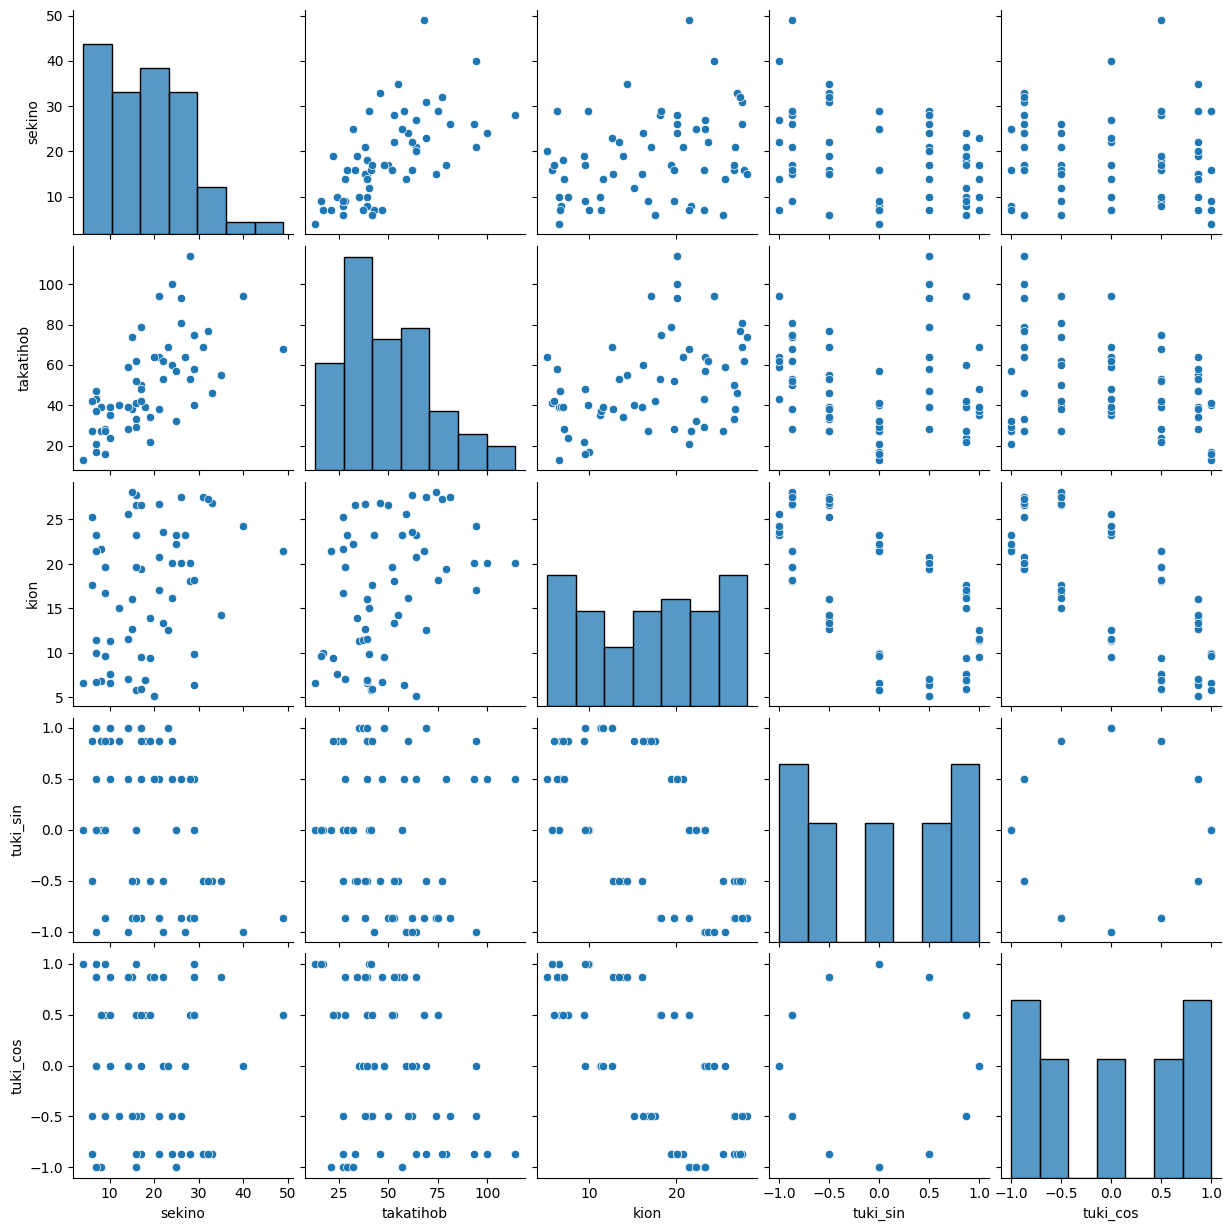

In [5]:
# Selecting the relevant columns (3rd to 7th) for the scatter plot matrix
columns_to_plot_updated = data[['sekino', 'takatihob', 'kion', 'tuki_sin', 'tuki_cos']]

# Create a pairplot (scatter plot matrix) for the selected columns
sns.pairplot(columns_to_plot_updated)

# Show the plot
plt.show()